In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
path_phap = r"C:\Users\user\Desktop\phap"
path_thien = r"C:\Users\user\Desktop\thien"
path_viet = r"C:\Users\user\Desktop\Viet"
path_tienminh = r"C:\Users\user\Desktop\tien minh"
path_tien = r"C:\Users\user\Desktop\tiến"
path_trung = r"C:\Users\user\Desktop\Trung"
path_tuan = r"C:\Users\user\Desktop\Tuấn"

In [3]:
def count_images_in_folder(folder_path):
    image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp'}  
    image_count = 0
    for filename in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, filename)):
            if os.path.splitext(filename)[1].lower() in image_extensions:
                image_count += 1

    return image_count

num_images = count_images_in_folder(path_phap)
num_images1 = count_images_in_folder(path_thien)
num_images2 = count_images_in_folder(path_viet)
num_images3 = count_images_in_folder(path_tienminh)
num_images4 = count_images_in_folder(path_tien)
num_images5 = count_images_in_folder(path_trung)
num_images6 = count_images_in_folder(path_tuan)
print(f"Số lượng hình ảnh trong thư mục {path_phap}: {num_images}")
print(f"Số lượng hình ảnh trong thư mục {path_thien}: {num_images1}")
print(f"Số lượng hình ảnh trong thư mục {path_viet}: {num_images2}")
print(f"Số lượng hình ảnh trong thư mục {path_tienminh}: {num_images3}")
print(f"Số lượng hình ảnh trong thư mục {path_tien}: {num_images4}")
print(f"Số lượng hình ảnh trong thư mục {path_trung}: {num_images5}")
print(f"Số lượng hình ảnh trong thư mục {path_tuan}: {num_images6}")

Số lượng hình ảnh trong thư mục C:\Users\user\Desktop\phap: 220
Số lượng hình ảnh trong thư mục C:\Users\user\Desktop\thien: 186
Số lượng hình ảnh trong thư mục C:\Users\user\Desktop\Viet: 200
Số lượng hình ảnh trong thư mục C:\Users\user\Desktop\tien minh: 200
Số lượng hình ảnh trong thư mục C:\Users\user\Desktop\tiến: 200
Số lượng hình ảnh trong thư mục C:\Users\user\Desktop\Trung: 219
Số lượng hình ảnh trong thư mục C:\Users\user\Desktop\Tuấn: 200


In [4]:
def preprocess_image(image_path):
    image = cv.imread(image_path)
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    resized_image = cv.resize(gray_image, (100, 100))
    denoised_image = cv.GaussianBlur(resized_image, (5, 5), 0)
    return denoised_image

In [6]:
from mtcnn import MTCNN
import cv2
import os
import matplotlib.pyplot as plt

LABELS = ["phap", "thien", "viet", "tien minh", "tien", "trung", "tuan"]
PATHS = [path_phap, path_thien, path_viet, path_tienminh, path_tien, path_trung, path_tuan]
detector = MTCNN()

X_update = []
y_update = []
def extract_and_label_faces_from_directory(dir_path, label):
    if not os.path.exists(dir_path):
        print(f"Directory {dir_path} does not exist")
        return

    for filename in os.listdir(dir_path):
        image_path = os.path.join(dir_path, filename)
        if filename.endswith((".jpg", ".jpeg", ".png","JPG")):
            print(f"Reading image from: {image_path}")

            image = cv2.imread(image_path)

            if image is None:
                print(f"Failed to load image at {image_path}")
                continue
            faces = detector.detect_faces(image)

            print(f"Found {len(faces)} face(s) in {label}.")
            for face in faces:
                x, y_, w, h = face['box']
                face_image = image[y_:y_ + h, x:x + w]
                X_update.append(face_image)
                y_update.append(label)
for label, path in zip(LABELS, PATHS):
    extract_and_label_faces_from_directory(path, label)






Reading image from: C:\Users\user\Desktop\Hoa_update\z5590431981723_e46dd167db1cd6d2ae8ea4ac7dbeeced.jpg
1/1 [==============================] - 0s 150ms/step
Found 1 face(s) in Hoa.
Reading image from: C:\Users\user\Desktop\Hoa_update\z5590431988558_6edf5799243a711f8ee8c0d7e2ed7ae0.jpg
1/1 [==============================] - 0s 25ms/step
Found 1 face(s) in Hoa.
Reading image from: C:\Users\user\Desktop\Hoa_update\z5590431997673_b496724035264bc99825a00752448f08.jpg
1/1 [==============================] - 0s 28ms/step
Found 1 face(s) in Hoa.
Reading image from: C:\Users\user\Desktop\Hoa_update\z5590431997974_f612fd64043a3aaf2ded475d21551693.jpg
1/1 [==============================] - 0s 27ms/step
Found 1 face(s) in Hoa.
Reading image from: C:\Users\user\Desktop\Hoa_update\z5590432003408_64d8ee79f58e54ba6e4d6b7bfea1ca94.jpg
1/1 [==============================] - 0s 25ms/step
Found 1 face(s) in Hoa.
Reading image from: C:\Users\user\Desktop\Hoa_update\z5590432009172_3cb24d42d8a2d2c0a80580c

In [7]:
import pickle
with open('Face_class.pkl', 'wb') as f:
    pickle.dump((X_update, y_update), f)

print("Dữ liệu đã được lưu vào Face_class.pkl")


Dữ liệu đã được lưu vào faces_data.pkl


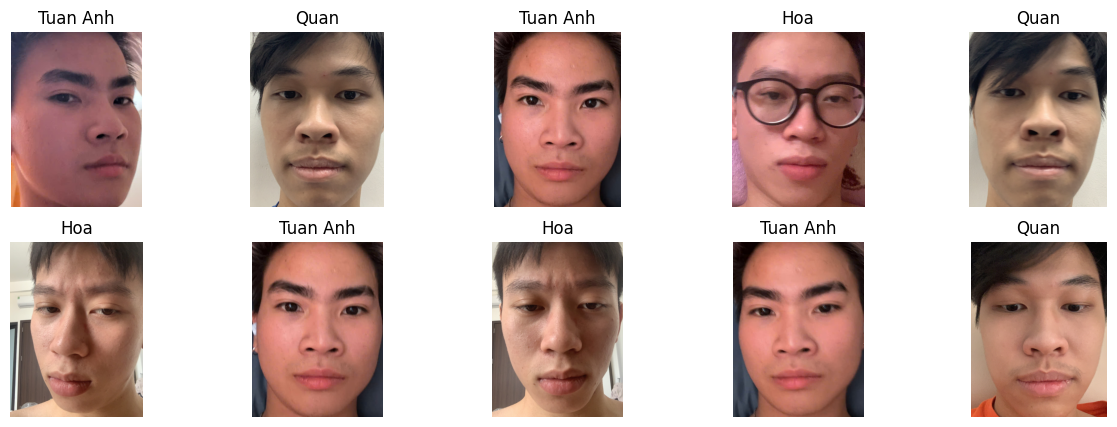

Total faces extracted: 1297
Total labels extracted: 1297


In [8]:
import random
indices = random.sample(range(len(X_update)), min(10, len(X_update)))

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(X_update[idx], cv2.COLOR_BGR2RGB))  
    plt.title(y_update[idx]) 
    plt.axis('off')

plt.show()

print(f"Total faces extracted: {len(X_update)}")
print(f"Total labels extracted: {len(y_update)}")